<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [4]:
product_df= pd.read_csv("/content/drive/MyDrive/NLP LAB1/product_data.csv")
review_df = pd.read_csv("/content/drive/MyDrive/NLP LAB1/reviews.csv")

In [5]:
product_df.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
63,B00JEHJMG8,Samsung,Samsung Galaxy S4 16GB SPH-L720 4G LTE Android...,https://www.amazon.com/Samsung-Galaxy-SPH-720T...,https://m.media-amazon.com/images/I/61Uy8S7wD9...,3.3000000,https://www.amazon.com/product-reviews/B00JEHJMG8,135,0.0000000,0.0000000
90,B00V7FXCZ2,Samsung,"Samsung Galaxy S6, Black Sapphire 32GB (Verizo...",https://www.amazon.com/Samsung-Galaxy-S6-Sapph...,https://m.media-amazon.com/images/I/81Uvtgw9D9...,3.5000000,https://www.amazon.com/product-reviews/B00V7FXCZ2,1,0.0000000,0.0000000
699,B07YVGVQKL,Samsung,"Samsung Galaxy A50 SM-A505G 128GB, Dual Sim, 6...",https://www.amazon.com/Samsung-SM-A505G-Infini...,https://m.media-amazon.com/images/I/51d6hsShnA...,3.3000000,https://www.amazon.com/product-reviews/B07YVGVQKL,7,285.9900000,0.0000000
416,B07FXRR28W,Samsung,Samsung Galaxy Note 5 SM-N920T 32GB Platinum G...,https://www.amazon.com/Samsung-Galaxy-Note-SM-...,https://m.media-amazon.com/images/I/71xJxyzDYa...,3.7000000,https://www.amazon.com/product-reviews/B07FXRR28W,9,344.9100000,0.0000000
301,B0766TPHSH,Google,Google Pixel 2 XL 64GB Unlocked GSM/CDMA 4G LT...,https://www.amazon.com/Google-Unlocked-Octa-Co...,https://m.media-amazon.com/images/I/81dXcgzgqk...,4.1000000,https://www.amazon.com/product-reviews/B0766TPHSH,153,409.8800000,0.0000000


In [6]:
review_df.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
19074,B018OMP8ES,C. Ramirez,2,"June 23, 2018",True,Nice until the screen starts peeling.,The backing peels away from the top-left of th...,nan
37060,B072N3GKSM,casey,1,"August 15, 2018",False,Good way to waste 399.00,I bought this in Feb. It was a great phone. Lo...,1.0000000
53124,B07HK4JNV1,Behomar R.,5,"May 13, 2019",True,Excelente teléfono,Super feliz,nan
54157,B07J4Z9647,Amazon Customer,5,"June 8, 2019",True,An actually steal,Buy this phone! It is so freaking cool. The fr...,nan
5838,B00CGIULGC,brian griffin,5,"February 3, 2015",True,Five Stars,best phone and toughest over 2 years of abuse ...,nan


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [7]:
product_df.drop(['url','image','reviewUrl'],axis=1,inplace = True)
product_df.head()

,asin,brand,title,rating,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,3.0000000,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7000000,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,3.3000000,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,3.1000000,12,149.9900000,0.0000000


In [8]:
review_df.drop(['date','name'],axis=1,inplace = True)
review_df.head()

,asin,rating,verified,title,body,helpfulVotes
0,B0000SX2UC,3,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,1,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,5,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,3,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,4,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [9]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   rating         720 non-null    float64
 4   totalReviews   720 non-null    int64  
 5   price          720 non-null    float64
 6   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 39.5+ KB


In [10]:
product_df.shape

(720, 7)

In [11]:
product_df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,720,720,B06XZPNYL7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,716,10,Samsung,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,720,718,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,720.0000000,NaN,NaN,NaN,3.7137500,0.7160138,1.0000000,3.3000000,3.8000000,4.1000000,5.0000000
totalReviews,720.0000000,NaN,NaN,NaN,105.6791667,167.6011014,1.0000000,7.0000000,32.0000000,122.2500000,983.0000000
price,720.0000000,NaN,NaN,NaN,234.9489306,200.0084407,0.0000000,97.5125000,188.9750000,336.7250000,999.9900000
originalPrice,720.0000000,NaN,NaN,NaN,63.6907778,172.4053696,0.0000000,0.0000000,0.0000000,0.0000000,999.9900000


In [12]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   rating        67986 non-null  int64  
 2   verified      67986 non-null  bool   
 3   title         67972 non-null  object 
 4   body          67965 non-null  object 
 5   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 2.7+ MB


In [13]:
review_df.shape

(67986, 6)

In [14]:
review_df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,67986,720,B00F2SKPIM,981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,67986.0000000,NaN,NaN,NaN,3.8079163,1.5829058,1.0000000,3.0000000,5.0000000,5.0000000,5.0000000
verified,67986,2,True,61225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,67972,41489,Five Stars,6043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body,67965,59811,Good,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpfulVotes,27215.0000000,NaN,NaN,NaN,8.2296895,31.9548772,1.0000000,1.0000000,2.0000000,5.0000000,990.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

From the product_df summary we can see that
* Number of Unique Products is 720
* Top Brand is Samsung
* Top Title is "Apple iPhone 6S, 64GB, Rose Gold - For AT&T"
* Range of Rating is 1 to 5
* Price range 0 to 999.99


In [15]:
product_df['brand'].value_counts()

Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
Name: brand, dtype: int64

In [16]:
# Title of most helpful review
#review_df[review_df.helpfulVotes == review_df['helpfulVotes'].max()].title

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

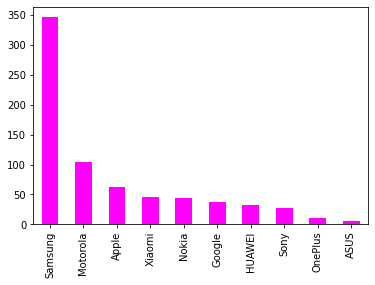

In [17]:
product_df['brand'].value_counts().plot(kind ='bar', color ='magenta')

In [18]:
product_df.groupby('brand').count()['asin']

brand
ASUS          5
Apple        63
Google       38
HUAWEI       32
Motorola    105
Nokia        44
OnePlus      10
Samsung     346
Sony         27
Xiaomi       46
Name: asin, dtype: int64

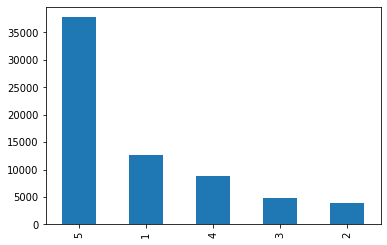

In [19]:
review_df['rating'].value_counts().plot(kind ='bar')

### 4.5 Display average rating per brand

In [20]:
product_df.groupby('brand')['rating'].mean()

brand
ASUS       3.8600000
Apple      3.7825397
Google     3.7710526
HUAWEI     4.0218750
Motorola   3.6438095
Nokia      3.3863636
OnePlus    3.5800000
Samsung    3.6326590
Sony       3.7888889
Xiaomi     4.4152174
Name: rating, dtype: float64

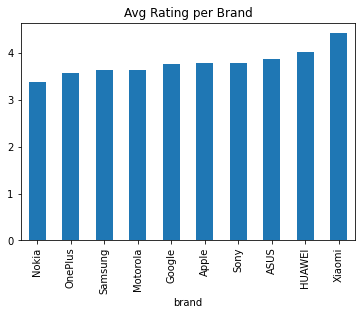

In [21]:
product_df.groupby('brand').mean()['rating'].sort_values().plot(kind = 'bar', title = "Avg Rating per Brand")

### 4.6 Display average price per brand

In [22]:
product_df.groupby('brand')['price'].mean()

brand
ASUS       309.6860000
Apple      303.5811111
Google     241.8676316
HUAWEI     218.8290625
Motorola   139.1210476
Nokia      111.4438636
OnePlus    426.1960000
Samsung    256.5272543
Sony       332.7248148
Xiaomi     214.9676087
Name: price, dtype: float64

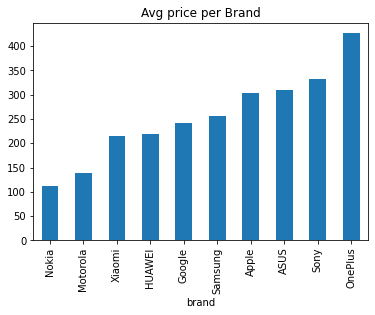

In [23]:
product_df.groupby('brand')['price'].mean().sort_values().plot(kind = 'bar', title = "Avg price per Brand")

### 4.7 Display average 'totalReviews' per brand

In [24]:
product_df.groupby('brand')['totalReviews'].mean()

brand
ASUS        52.6000000
Apple      100.2380952
Google     111.5263158
HUAWEI      77.0937500
Motorola    89.7047619
Nokia      140.5000000
OnePlus     40.6000000
Samsung    108.9624277
Sony       122.6666667
Xiaomi     121.1739130
Name: totalReviews, dtype: float64

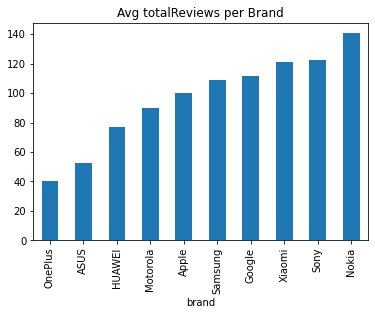

In [25]:
product_df.groupby('brand')['totalReviews'].mean().sort_values().plot(kind = 'bar', title = "Avg totalReviews per Brand")

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [26]:
merged_df = pd.merge(review_df, product_df, on ='asin',how = 'left')

In [27]:
merged_df.head()

,asin,rating_x,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
0,B0000SX2UC,3,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,1,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
2,B0000SX2UC,5,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
3,B0000SX2UC,3,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
4,B0000SX2UC,4,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


In [28]:
merged_df.shape

(67986, 12)

In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67986 entries, 0 to 67985
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           67986 non-null  object 
 1   rating_x       67986 non-null  int64  
 2   verified       67986 non-null  bool   
 3   title_x        67972 non-null  object 
 4   body           67965 non-null  object 
 5   helpfulVotes   27215 non-null  float64
 6   brand          67786 non-null  object 
 7   title_y        67986 non-null  object 
 8   rating_y       67986 non-null  float64
 9   totalReviews   67986 non-null  int64  
 10  price          67986 non-null  float64
 11  originalPrice  67986 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 6.3+ MB


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [30]:
merged_df.rename(columns = {"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace = True)
merged_df.head()

,asin,user_rating,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price,originalPrice
0,B0000SX2UC,3,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,1,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
2,B0000SX2UC,5,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
3,B0000SX2UC,3,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
4,B0000SX2UC,4,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [31]:
merged_df.shape

(67986, 12)

In [32]:
merged_df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [33]:
final_df = merged_df[(merged_df["verified"] == True)]
final_df.shape

(61225, 12)

In [34]:
final_df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,61225,712,B00F2SKPIM,850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_rating,61225.0000000,NaN,NaN,NaN,3.8635688,1.5609246,1.0000000,3.0000000,5.0000000,5.0000000,5.0000000
verified,61225,1,True,61225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_title,61211,36450,Five Stars,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body,61207,53569,Good,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpfulVotes,23162.0000000,NaN,NaN,NaN,7.8682756,31.7280029,1.0000000,1.0000000,2.0000000,4.0000000,990.0000000
brand,61078,10,Samsung,31020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_title,61225,710,"Samsung Galaxy Note 3, Black 32GB (Verizon Wir...",850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall_rating,61225.0000000,NaN,NaN,NaN,3.7761813,0.4287652,1.0000000,3.5000000,3.8000000,4.1000000,5.0000000
totalReviews,61225.0000000,NaN,NaN,NaN,374.0600572,263.1254105,1.0000000,153.0000000,325.0000000,558.0000000,983.0000000


### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [35]:
final_df['brand'].value_counts()

Samsung     31020
Motorola     7714
Nokia        4878
Apple        4876
Xiaomi       4207
Google       3163
Sony         2691
HUAWEI       2019
OnePlus       304
ASUS          206
Name: brand, dtype: int64

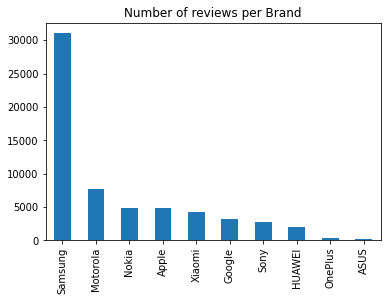

In [36]:
final_df['brand'].value_counts().sort_values(ascending = False).plot(kind = 'bar', title = "Number of reviews per Brand")

From the above "Samsung" has the highest number of reviews

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [37]:
final_df2 = final_df[['brand','body','price','user_rating','review_title' ]]
final_df2.head()

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but"
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...


In [38]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         61078 non-null  object 
 1   body          61207 non-null  object 
 2   price         61225 non-null  float64
 3   user_rating   61225 non-null  int64  
 4   review_title  61211 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

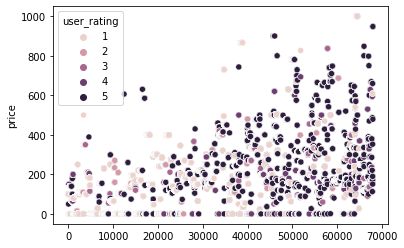

In [39]:

sns.scatterplot(x=final_df2.index, y=final_df2['price'],hue = final_df2['user_rating'])

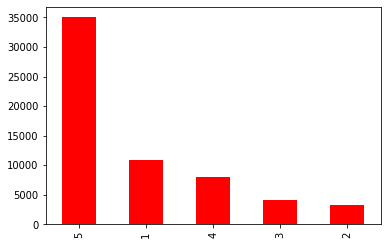

In [40]:
final_df2['user_rating'].value_counts().plot(kind ='bar', color ='red')

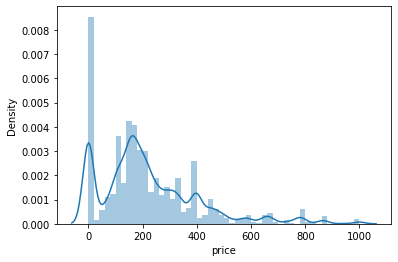

In [41]:
sns.distplot(final_df2['price'])

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [42]:
# One way of doing it is through lambda function 
#final_df2['sentiment']= final_df2['user_rating'].apply(lambda x : 1 if x>3 else(0 if x==1 else -1) )

In [43]:
# I am useing the below loc to implement the same
final_df2.loc[final_df2['user_rating'] > 3, 'sentiment'] = 1
final_df2.loc[final_df2['user_rating'] == 3, 'sentiment'] = 0
final_df2.loc[final_df2['user_rating'] < 3, 'sentiment'] = -1
final_df2.head()

,brand,body,price,user_rating,review_title,sentiment
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,-1.0000000
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,-1.0000000
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product,1.0000000
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but",1.0000000
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1.0000000


### 4.15 Check frequency distribution of the 'sentiment'

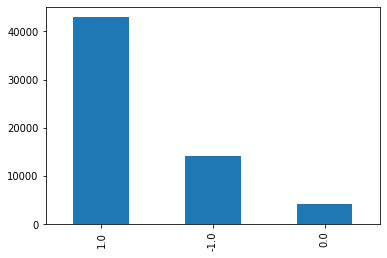

In [44]:
final_df2['sentiment'].value_counts().plot(kind ='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

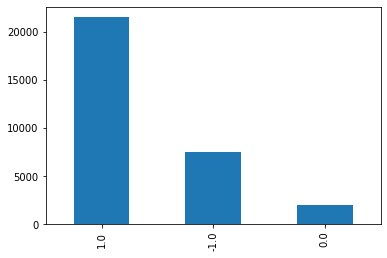

In [45]:
final_df2[final_df2.brand == 'Samsung'].sentiment.value_counts().plot(kind ='bar')

In [46]:
pd.crosstab(final_df2.brand, final_df2.sentiment)

sentiment,-1.0000000,0.0000000,1.0000000
brand,,,
ASUS,49,20,137
Apple,1320,307,3249
Google,804,207,2152
HUAWEI,261,105,1653
Motorola,1667,553,5494
Nokia,1437,467,2974
OnePlus,34,11,259
Samsung,7469,2030,21521
Sony,663,216,1812


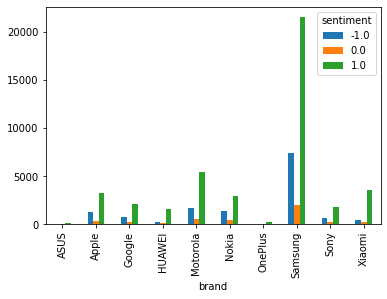

In [47]:
pd.crosstab(final_df2['brand'], final_df2['sentiment']).plot(kind='bar')

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [48]:
final_df2['body'] = final_df2['body'].astype('str')


In [49]:
final_df2['body'] = final_df2['body'].apply(lambda x: x.lower ())

In [50]:
final_df2['body'].sample(2)

63440    white trash presentation comes with half truth...
34416                                      exelent phone !
Name: body, dtype: object

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [51]:
import re
final_df2['body'] = final_df2['body'].apply(lambda x: re.sub(r'[^\w\s]','',x))
final_df2['body'].head(2)

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
Name: body, dtype: object

In [52]:
import string
ignore_list = string.punctuation
punct = str.maketrans('','',ignore_list)
final_df2['body'] = final_df2['body'].apply(lambda x: x.translate(punct))
final_df2.head(2)

,brand,body,price,user_rating,review_title,sentiment
14,Motorola,dont buy out of service,49.9500000,1,Stupid phone,-1.0000000
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,1,Phones locked,-1.0000000


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [54]:
stop = set(stopwords.words('english'))
print(stop)

{'mustn', 'y', 'against', 'ma', 'and', 'at', 'them', 'being', 'after', 'below', 'herself', 'having', "you're", 'yourself', 't', "it's", 'don', 'himself', 'into', 'aren', 'so', "doesn't", 'too', 'mightn', 're', 'do', 'itself', 'these', 'he', 'myself', "weren't", 'or', 'above', 'few', 'his', "she's", "shan't", 'haven', 'ours', 'through', 'did', 'she', 'under', "wasn't", 'once', 'just', 'i', "aren't", 'only', 'me', 'have', 'be', 'd', 'there', 'on', 'some', 'isn', 've', 'themselves', "wouldn't", 'hadn', 'has', 'off', 's', 'any', 'from', 'down', 'than', 'out', 'ain', "hasn't", 'over', 'does', 'an', 'most', 'this', 'o', 'my', 'such', "won't", 'are', 'then', 'no', "hadn't", 'how', 'wasn', 'wouldn', 'a', 'couldn', "mustn't", 'by', 'its', 'all', 'll', 'nor', 'other', 'again', 'yours', 'each', 'needn', 'was', 'if', 'him', 'didn', 'when', 'doesn', 'until', 'which', 'can', 'we', 'very', "you've", 'hers', 'further', 'had', 'yourselves', 'their', 'in', "isn't", 'were', 'is', 'm', 'that', 'those', 'h

In [55]:
final_df2['body'] = final_df2['body'].apply(lambda words : ' '.join(word for word in words.split() if word not in stop))
final_df2['body'].head(2)

14                                   dont buy service
17    1 star phones locked pay additional fees unlock
Name: body, dtype: object

In [56]:
final_df2.head(2)

,brand,body,price,user_rating,review_title,sentiment
14,Motorola,dont buy service,49.9500000,1,Stupid phone,-1.0000000
17,Motorola,1 star phones locked pay additional fees unlock,49.9500000,1,Phones locked,-1.0000000


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [57]:
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
  return ' '.join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [58]:
final_df2['body'] = final_df2['body'].apply(lemmatize_text)
final_df2.head(2)

,brand,body,price,user_rating,review_title,sentiment
14,Motorola,dont buy service,49.9500000,1,Stupid phone,-1.0000000
17,Motorola,1 star phone locked pay additional fee unlock,49.9500000,1,Phones locked,-1.0000000


### 5.5 Write a function to check word frequency of the text

In [58]:
# This question is N/A as instructed by Lab instructor and class coordinator

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [58]:
# This question is N/A as instructed by Lab instructor and class coordinator

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [60]:
transformed_text = tfidf_vectorizer.fit_transform(final_df2['body'])

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [61]:
y1 = final_df2['sentiment']
y2 = final_df2['user_rating']

### 5.9 Split the data into Train & Test Sets

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(transformed_text, y1, stratify = y1, test_size = 0.3, random_state = 42)
X_train, X_test, y2_train, y2_test = train_test_split(transformed_text, y1, stratify = y2, test_size = 0.3, random_state = 42)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [63]:
from sklearn.ensemble import RandomForestClassifier
randomforrest = RandomForestClassifier()

randomforrest.fit(X_train, y1_train)

print("Train Score  : ", randomforrest.score(X_train, y1_train))

Train Score  :  0.9473831579438599


In [64]:
print("Test Score  : ", randomforrest.score(X_test, y1_test))

Test Score  :  0.6820557491289199


In [66]:
from sklearn.metrics import confusion_matrix
pred = randomforrest.predict(X_test)
print(confusion_matrix(y1_test,pred))

[[  117    26  4105]
 [   52    12  1174]
 [  408    75 12399]]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,pred))

              precision    recall  f1-score   support

        -1.0       0.20      0.03      0.05      4248
         0.0       0.11      0.01      0.02      1238
         1.0       0.70      0.96      0.81     12882

    accuracy                           0.68     18368
   macro avg       0.34      0.33      0.29     18368
weighted avg       0.55      0.68      0.58     18368



## 7. Write your conclusion

Random forrest classiier gave a 68% accuracy. Macro avg is low, so data is imbalanced across the three classes. We can see that is true becuse there are very few records for Neutral (zero) value of sentiment.